In [20]:
### Dataset Analysis
from thermo_validity import validity
import numpy as np
cutoff = 143.957
p_dataset = np.load("GPT_FA/M2_data_7.npy", allow_pickle=True)
generated = np.load("GPT_FA/generated_M2_7.npy",allow_pickle=True)
results = np.load("GPT_FA/results_candidates_7.npy")
print(len(p_dataset))
valid = validity(generated)
print(len(valid))
unique = np.unique(valid)
print(len(unique))
n_dataset = np.unique(np.concatenate((p_dataset, unique), axis=0))
print(len(n_dataset))
datalist = n_dataset[np.where(np.isin(n_dataset, p_dataset, invert=True))[0]]
print(len(datalist), len(results))
nonzero_results = results[np.where(results > 0)]
good_layouts = []
good_results = []
print("Optimization Results:", len(nonzero_results), len(results))
for i in range(len(results)):
    if results[i] < cutoff and results[i] > 0:
        good_layouts.append(datalist[i])
        good_results.append(results[i])
print("Good layouts", len(good_layouts))
good_layouts = np.asanyarray(good_layouts)
good_results = np.asanyarray(good_results)
indices = np.argsort(good_results)
sorted_results = good_results[indices]
sorted_layouts = good_layouts[indices]
print(sorted_results[:10], sorted_layouts[:10])

3213
2999
2198
4280
1067 1067
Optimization Results: 857 1067
Good layouts 503
[134.00961811 134.24725465 134.28193699 134.36114637 134.53036942
 134.57316557 134.57559061 134.6062756  134.66544782 134.67753085] ['GTaACaHTHTHE' 'GACaH-1HTa1TA1E' 'GaH-1HTa1TA1ACE' 'GTHTaACHCaHE'
 'GTH1ACaH-1HTaT1THE' 'GTHTaACHCaE' 'GTHTHTA1ACaH-1HTa1E'
 'GT1TA1ACaH-1HTaE' 'Ga1HTH1ACHaH-1HTE' 'GHTa1THTHT1ACaH-1E']


number of designs 2041
number of results 2041


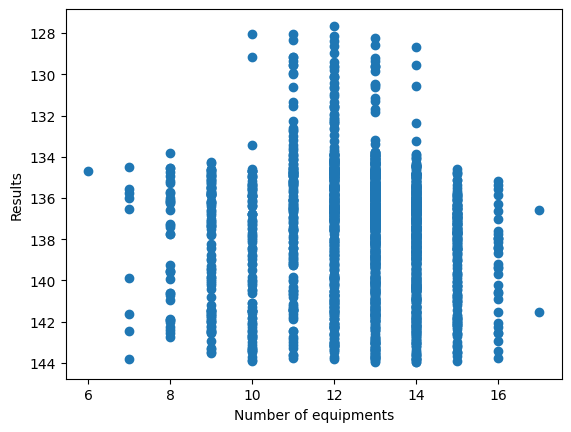

12.649191572758452 1.6997594962157225
137.72706518386045 3.0020945216874044
127.65077757018379 [0, 7, 4, 1, 5, 2, 3, 9, 5, 7, 4, 1, 4, 11]


In [29]:
import numpy as np
import config 
designs = np.load(config.DATA_DIRECTORY/"v22DF_m2_layouts.npy", allow_pickle=True)
results = np.load(config.DATA_DIRECTORY/"v22DF_m2_results.npy", allow_pickle=True)

from split_functions import string_to_equipment
equipments = string_to_equipment(designs)
print ("number of designs", len(equipments))
print("number of results", len(results))
lengths = []
for i in range(len(equipments)):
    lengths.append(len(equipments[i])-2)
lengths = np.array(lengths)
import matplotlib.pyplot as plt
plt.scatter(lengths, results)
plt.xlabel("Number of equipments")
plt.ylabel("Results")
plt.gca().invert_yaxis()
plt.show()
print(np.mean(lengths), np.std(lengths))
print(np.mean(results), np.std(results))
#the minimum result and the corresponding design
min_index = np.argmin(results)
print(results[min_index], equipments[min_index])

In [ ]:
### Broken ones
results = np.load("202407151312_GPT_NA/results_candidates_3.npy")
p_dataset = np.load("202407151312_GPT_NA/M2_data_3.npy", allow_pickle=True)
generated = np.load("202407151312_GPT_NA/generated_M2_3.npy",allow_pickle=True)
positions = np.load("202407151312_GPT_NA/positions_candidates_3.npy",allow_pickle=True)
valid = validity(generated)
unique = np.unique(valid)
n_dataset = np.unique(np.concatenate((p_dataset, unique), axis=0))
datalist = n_dataset[np.where(np.isin(n_dataset, p_dataset, invert=True))[0]]
print(len(datalist), len(results))
indices = np.argsort(results)
sorted_results = results[indices]
sorted_layouts = datalist[indices]
sorted_positions = positions[indices]
print(sorted_results[:23])
print(sorted_layouts[:23])
print(sorted_positions[:23])